# Pré-processamento dos dados

Nesse momento será feita uma simples descrição dos dados e limpeza se necessária.

In [1]:
#Importando módulos utilizados
import pandas as pd

### 1 Dataset de taxas de câmbio

In [2]:
data = pd.read_csv('datasets/raw/exchange_rate.csv')
data.head()

,Unnamed: 0,EUR,GBP,INR,AUD,CAD,SGD,CHF,MYR,JPY,...,SAR,ZAR,LKR,SEK,TWD,THB,TTD,TRY,AED,VEF
0,2022-10-28,1.006649,0.864114,82.350671,1.563423,1.362328,1.412645,0.996824,4.721493,147.699754,...,3.75,18.178368,365.504838,10.990230,32.129516,38.006384,6.778452,18.609938,3.6725,850351.855898
1,2022-10-27,1.001526,0.864250,82.362716,1.544216,1.353543,1.407655,0.989882,4.714796,146.011366,...,3.75,17.918148,365.318333,10.937726,32.033000,37.769487,6.770462,18.594566,3.6725,843457.785643
2,2022-10-26,0.993657,0.861563,82.010975,1.539422,1.355574,1.405711,0.986901,4.716826,146.549462,...,3.75,17.953964,364.994318,10.868461,32.122120,37.757633,6.736677,18.605791,3.6725,839402.331484
3,2022-10-25,1.003852,0.871802,82.488148,1.563574,1.361563,1.416409,0.995948,4.735091,147.820857,...,3.75,18.212705,365.697552,10.984768,32.270814,37.997712,6.728734,18.596393,3.6725,839228.271247
4,2022-10-24,1.012665,0.885427,82.806467,1.584956,1.370302,1.421593,1.000750,4.738023,148.749656,...,3.75,18.408829,367.009127,11.183642,32.371715,38.169402,6.739196,18.602842,3.6725,839274.934172


In [3]:
#Renomeando a coluna de data e exibindo todas as colunas do dataset
data.rename(columns={"Unnamed: 0": "Date"}, inplace=True)
print(list(data.columns))

['Date', 'EUR', 'GBP', 'INR', 'AUD', 'CAD', 'SGD', 'CHF', 'MYR', 'JPY', 'CNY', 'ARS', 'BHD', 'BWP', 'BRL', 'BND', 'BGN', 'CLP', 'COP', 'HRK', 'CZK', 'DKK', 'HKD', 'HUF', 'ISK', 'IDR', 'IRR', 'ILS', 'KZT', 'KRW', 'KWD', 'LYD', 'MUR', 'MXN', 'NPR', 'NZD', 'NOK', 'OMR', 'PKR', 'PHP', 'PLN', 'QAR', 'RON', 'RUB', 'SAR', 'ZAR', 'LKR', 'SEK', 'TWD', 'THB', 'TTD', 'TRY', 'AED', 'VEF']


In [4]:
#Verificando se há dados faltantes no dataset
data.isna().sum().sum()

2

In [5]:
#Preenchendo dados faltantes com a última observação
data = data.fillna(method='ffill',axis=0)
data.isna().sum().sum()

0

In [6]:
#Convertendo a coluna data para verificar se não há dados faltantes
data = data.astype({'Date': 'datetime64'}, copy=True, errors='raise')
data.head()

,Date,EUR,GBP,INR,AUD,CAD,SGD,CHF,MYR,JPY,...,SAR,ZAR,LKR,SEK,TWD,THB,TTD,TRY,AED,VEF
0,2022-10-28,1.006649,0.864114,82.350671,1.563423,1.362328,1.412645,0.996824,4.721493,147.699754,...,3.75,18.178368,365.504838,10.990230,32.129516,38.006384,6.778452,18.609938,3.6725,850351.855898
1,2022-10-27,1.001526,0.864250,82.362716,1.544216,1.353543,1.407655,0.989882,4.714796,146.011366,...,3.75,17.918148,365.318333,10.937726,32.033000,37.769487,6.770462,18.594566,3.6725,843457.785643
2,2022-10-26,0.993657,0.861563,82.010975,1.539422,1.355574,1.405711,0.986901,4.716826,146.549462,...,3.75,17.953964,364.994318,10.868461,32.122120,37.757633,6.736677,18.605791,3.6725,839402.331484
3,2022-10-25,1.003852,0.871802,82.488148,1.563574,1.361563,1.416409,0.995948,4.735091,147.820857,...,3.75,18.212705,365.697552,10.984768,32.270814,37.997712,6.728734,18.596393,3.6725,839228.271247
4,2022-10-24,1.012665,0.885427,82.806467,1.584956,1.370302,1.421593,1.000750,4.738023,148.749656,...,3.75,18.408829,367.009127,11.183642,32.371715,38.169402,6.739196,18.602842,3.6725,839274.934172


In [7]:
#Reordenando os dados de acordo com a data
data.sort_values(by=['Date'], ignore_index=True, inplace=True)
data['Date']

0      2012-01-01
1      2012-01-02
2      2012-01-03
3      2012-01-04
4      2012-01-05
          ...    
3949   2022-10-24
3950   2022-10-25
3951   2022-10-26
3952   2022-10-27
3953   2022-10-28
Name: Date, Length: 3954, dtype: datetime64[ns]

In [8]:
#Os dados estão parciais até o mês de outubro de 2022.
#Para que os datasets tenham o mesmo tamanho, vamos eliminar os valores do mês de outubro em diante
data = data.drop(data[data['Date'] >= pd.Timestamp(2022,10,1)].index)
data.tail()

,Date,EUR,GBP,INR,AUD,CAD,SGD,CHF,MYR,JPY,...,SAR,ZAR,LKR,SEK,TWD,THB,TTD,TRY,AED,VEF
3921,2022-09-26,1.039078,0.933255,81.700202,1.546348,1.374294,1.436244,0.992245,4.600304,144.437292,...,3.75,18.078531,364.161964,11.330379,31.833868,37.913428,6.796067,18.471635,3.6725,810328.420252
3922,2022-09-27,1.038966,0.928469,81.627419,1.550507,1.372994,1.437496,0.988768,4.610739,144.640457,...,3.75,17.970915,363.989834,11.338789,31.742100,37.975981,6.799289,18.493463,3.6725,809293.911997
3923,2022-09-28,1.032969,0.923935,81.578327,1.536330,1.365536,1.437041,0.976043,4.628581,144.193285,...,3.75,17.863853,363.988153,11.236617,31.758945,37.971660,6.801439,18.525337,3.6725,812359.522574
3924,2022-09-29,1.022960,0.904977,81.538370,1.540860,1.369885,1.434715,0.979608,4.635690,144.441536,...,3.75,17.981583,363.991076,11.184114,31.707745,37.945704,6.793665,18.499110,3.6725,813601.505982
3925,2022-09-30,1.021677,0.898448,81.383560,1.553622,1.375103,1.434735,0.984350,4.636509,144.715574,...,3.75,18.070353,365.471854,11.122885,31.791680,37.732783,6.788173,18.535192,3.6725,816959.962222


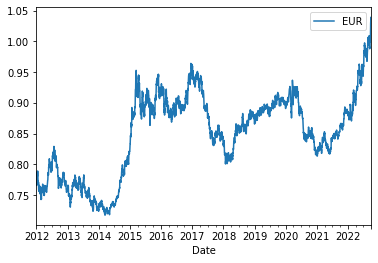

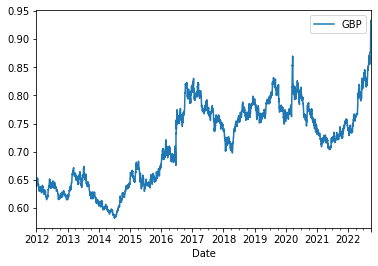

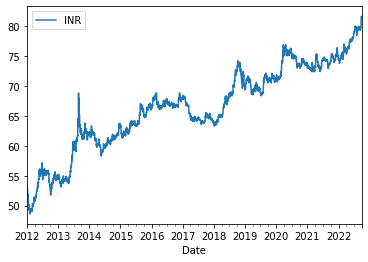

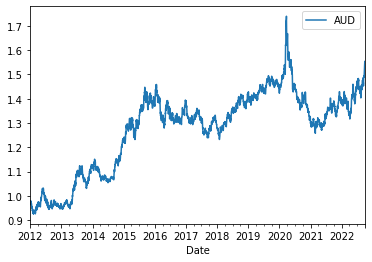

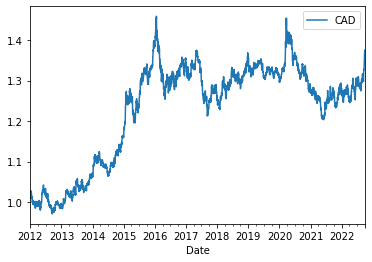

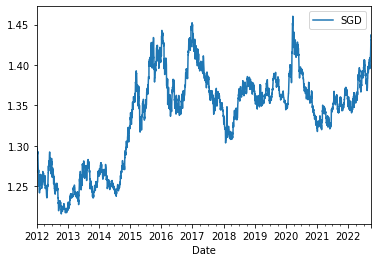

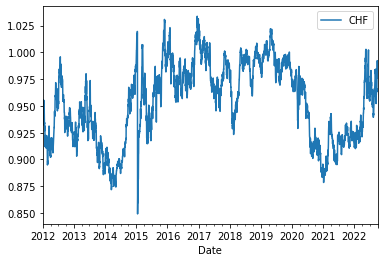

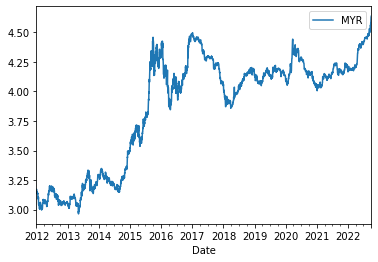

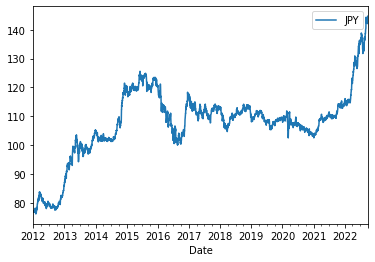

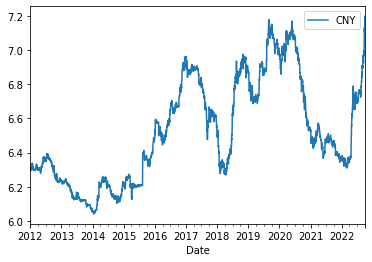

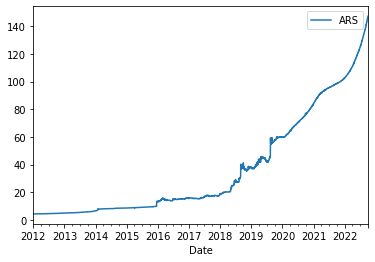

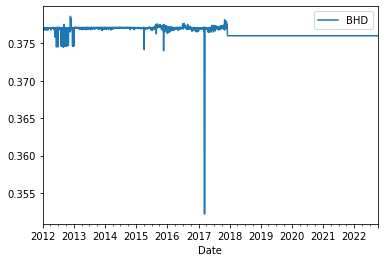

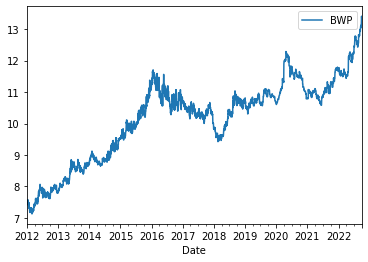

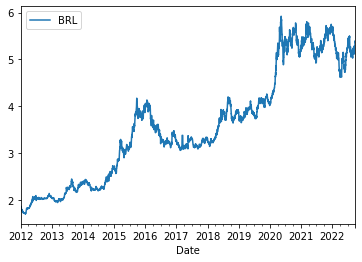

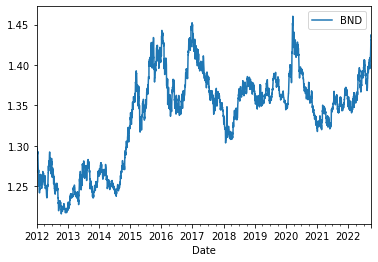

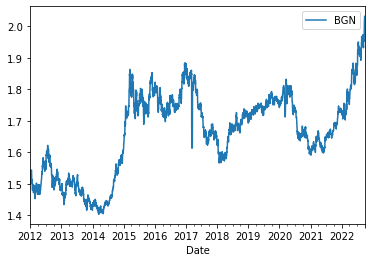

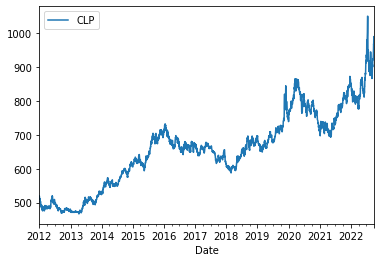

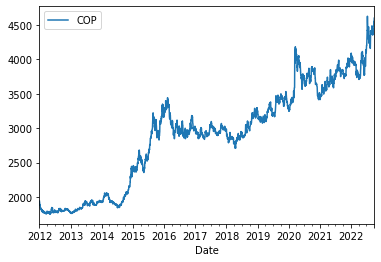

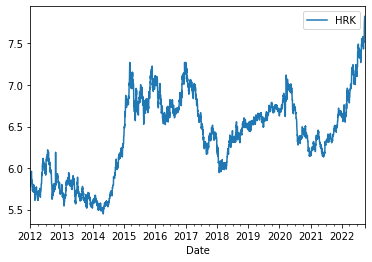

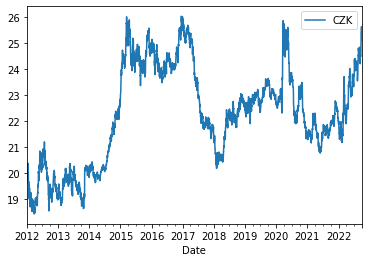

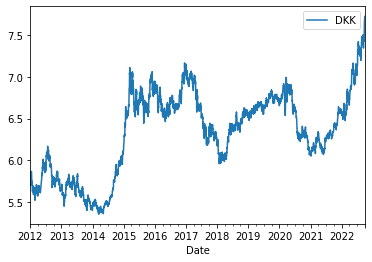

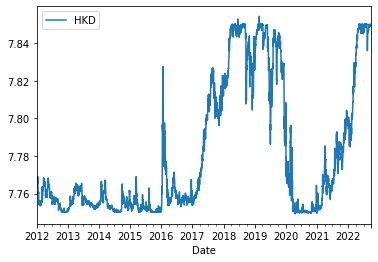

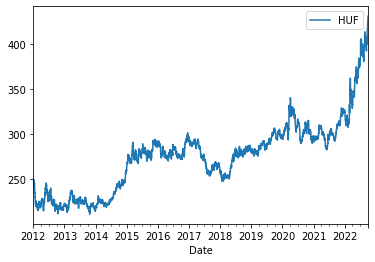

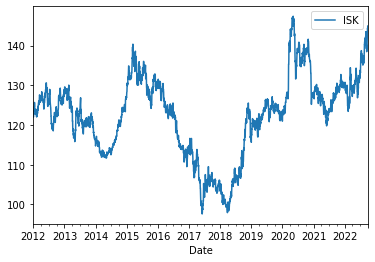

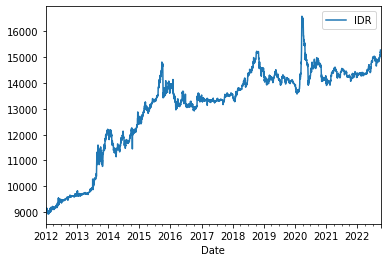

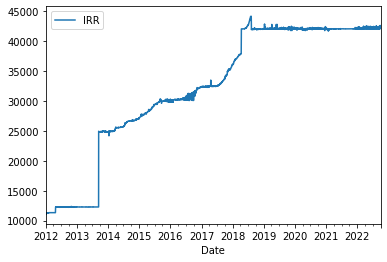

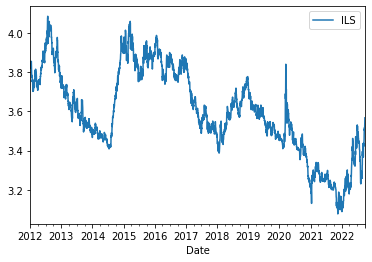

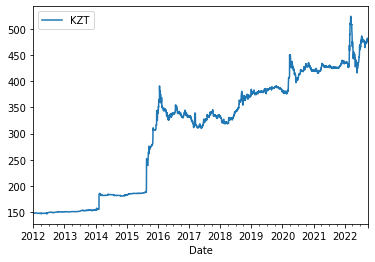

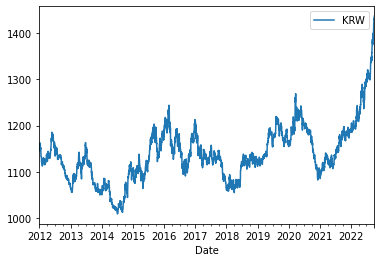

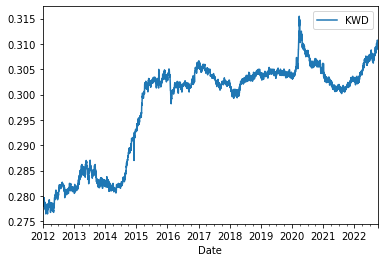

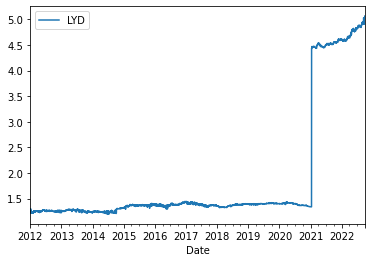

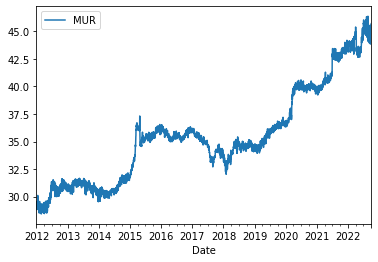

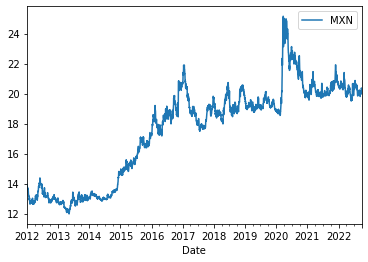

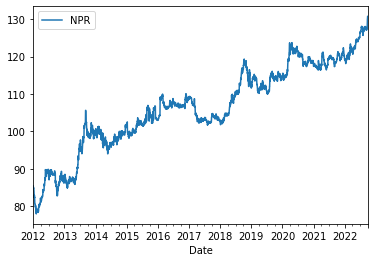

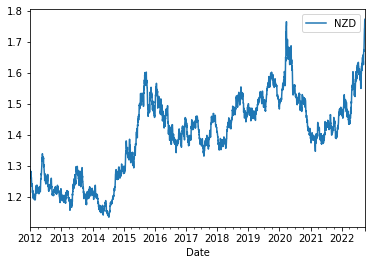

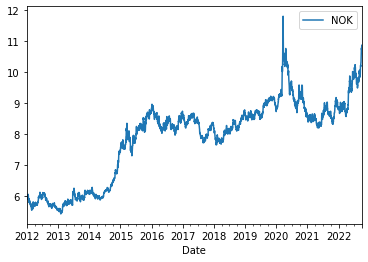

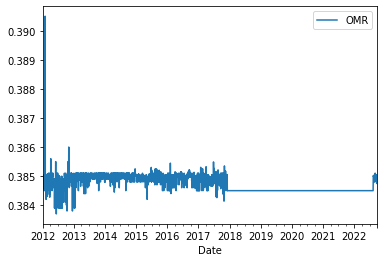

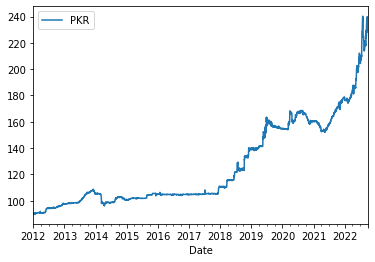

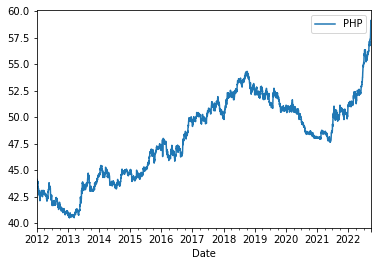

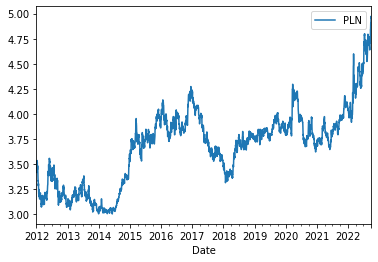

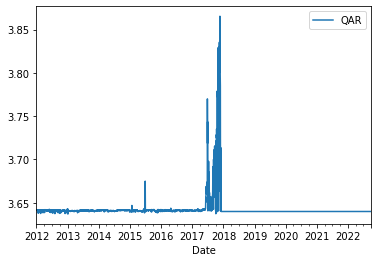

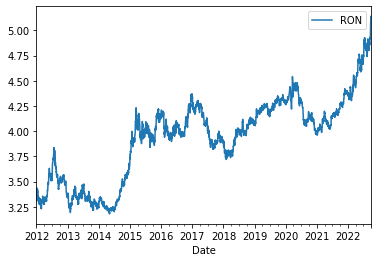

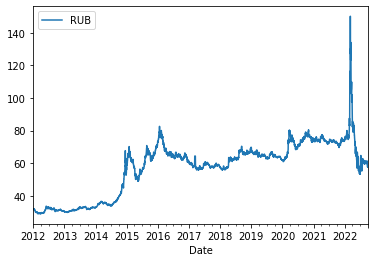

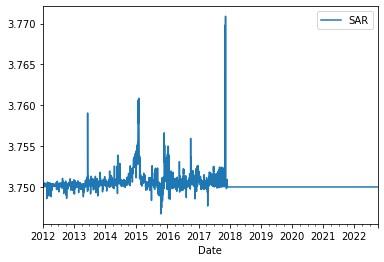

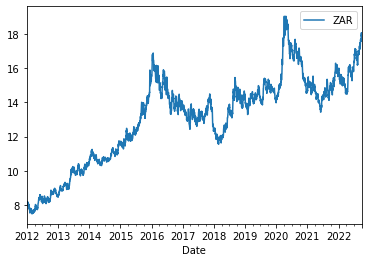

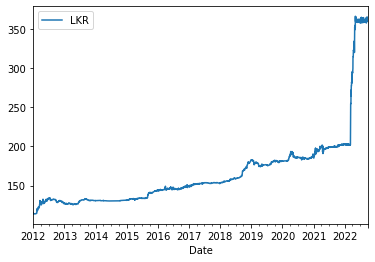

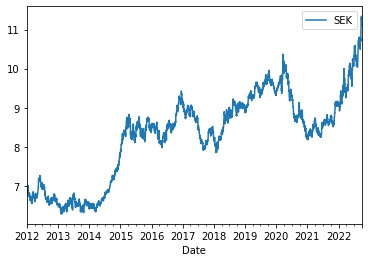

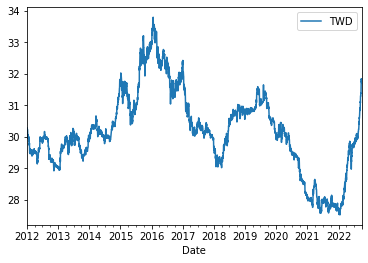

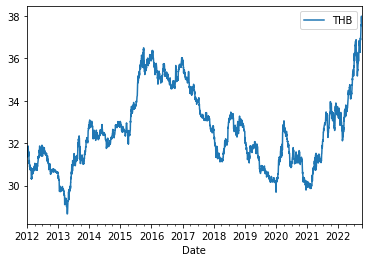

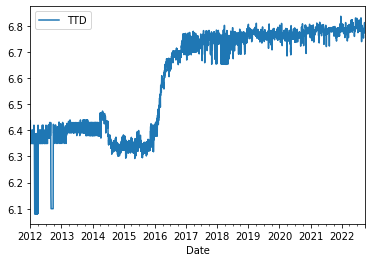

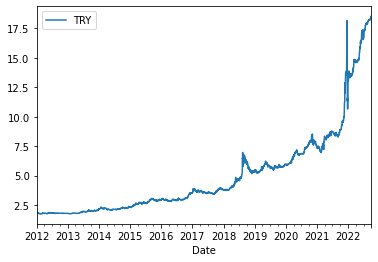

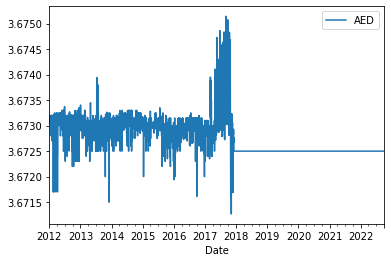

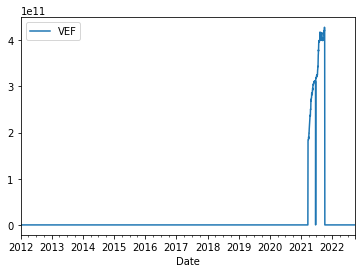

In [9]:
#Gerando gráficos das moedas para uma visualização rápida
import warnings
warnings.simplefilter(action='ignore', category=RuntimeWarning)
for i in list(data.columns)[1:]:
    data.plot('Date',i)

In [10]:
#O bolívar venezuelano (VEF) sofreu hiperinflação e está fora da escala do dataset.
#Sendo asism, iremos eliminar do dataset para não influenciar demais os outros resultados.
data.drop(['VEF'], axis=1, inplace=True)
data

,Date,EUR,GBP,INR,AUD,CAD,SGD,CHF,MYR,JPY,...,RUB,SAR,ZAR,LKR,SEK,TWD,THB,TTD,TRY,AED
0,2012-01-01,0.771664,0.644185,53.060001,0.979672,1.021600,1.296500,0.938550,3.169000,77.115000,...,32.000000,3.75025,8.080150,115.330002,6.905100,30.275000,31.545000,6.350000,1.892000,3.673050
1,2012-01-02,0.773932,0.645401,53.307503,0.978394,1.020710,1.297524,0.940457,3.172400,76.910073,...,32.118076,3.75004,8.078046,113.899991,6.905551,30.285639,31.544000,6.438000,1.895794,3.673099
2,2012-01-03,0.765684,0.638806,53.162204,0.963547,1.009643,1.282629,0.932033,3.147500,76.670837,...,31.719857,3.75020,8.025177,113.805000,6.816731,30.289988,31.336853,6.390003,1.872262,3.673100
3,2012-01-04,0.773249,0.639650,52.977501,0.966527,1.013466,1.287358,0.941689,3.135000,76.696983,...,31.781100,3.75025,8.145931,113.820007,6.851576,30.278000,31.511999,6.370000,1.883389,3.673100
4,2012-01-05,0.782138,0.645945,52.981000,0.975040,1.019637,1.291875,0.952495,3.149000,77.171299,...,32.040918,3.75025,8.172399,113.752002,6.929119,30.250000,31.594760,6.350000,1.881456,3.673200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3921,2022-09-26,1.039078,0.933255,81.700202,1.546348,1.374294,1.436244,0.992245,4.600304,144.437292,...,58.136142,3.75000,18.078531,364.161964,11.330379,31.833868,37.913428,6.796067,18.471635,3.672500
3922,2022-09-27,1.038966,0.928469,81.627419,1.550507,1.372994,1.437496,0.988768,4.610739,144.640457,...,59.342047,3.75000,17.970915,363.989834,11.338789,31.742100,37.975981,6.799289,18.493463,3.672500
3923,2022-09-28,1.032969,0.923935,81.578327,1.536330,1.365536,1.437041,0.976043,4.628581,144.193285,...,58.290356,3.75000,17.863853,363.988153,11.236617,31.758945,37.971660,6.801439,18.525337,3.672500
3924,2022-09-29,1.022960,0.904977,81.538370,1.540860,1.369885,1.434715,0.979608,4.635690,144.441536,...,57.562276,3.75000,17.981583,363.991076,11.184114,31.707745,37.945704,6.793665,18.499110,3.672500


In [11]:
#O dataset está pré-processado para uso, podemos gravar o arquivo
data.reset_index(drop=True, inplace=True)
data.to_csv('datasets/exchange_rates.csv', index_label='index')

### 2 Dataset de indicadores econômicos

Finalizado o pré-processamento básico do primeiro dataset, iremos realizar o mesmo procedimento com os outros

In [12]:
data = pd.read_csv('datasets/raw/economic_indicators.csv')
data.head()

,Date,Taxa Selic,IPCA,IGP-M,INPC,Desemprego PNADC
0,2010-01-01,8.75,0.75,0.63,0.88,NaN
1,2010-01-02,8.75,NaN,NaN,NaN,NaN
2,2010-01-03,8.75,NaN,NaN,NaN,NaN
3,2010-01-04,8.75,NaN,NaN,NaN,NaN
4,2010-01-05,8.75,NaN,NaN,NaN,NaN


In [13]:
data.count()

Date                4692
Taxa Selic          4692
IPCA                 153
IGP-M                154
INPC                 153
Desemprego PNADC     127
dtype: int64

In [14]:
data['IPCA'].value_counts().nlargest(10)

0.57    5
0.43    5
0.25    4
0.75    3
0.79    3
0.78    3
0.54    3
0.26    3
0.86    3
0.47    3
Name: IPCA, dtype: int64

O data frame está estruturado de modo que ele mostra apenas a variação dos índices, com exceção da SELIC. Sendo assim, podemos completar e propagar os dados faltantes, para evitar muitos valores nulos.

Antes disso devemos, porém, ordenar os dados de acordo com a série temporal para eliminar eventuais erros na ordem de entrada dos dados.

In [15]:
#Estipula o tipo de dados e organiza em ordem ascendente
data = data.astype({'Date': 'datetime64'}, copy=True, errors='raise')
data.sort_values(by=['Date'], ignore_index=True, inplace=True)
data

,Date,Taxa Selic,IPCA,IGP-M,INPC,Desemprego PNADC
0,2010-01-01,8.75,0.75,0.63,0.88,NaN
1,2010-01-02,8.75,NaN,NaN,NaN,NaN
2,2010-01-03,8.75,NaN,NaN,NaN,NaN
3,2010-01-04,8.75,NaN,NaN,NaN,NaN
4,2010-01-05,8.75,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
4687,2022-11-01,13.75,NaN,NaN,NaN,NaN
4688,2022-11-02,13.75,NaN,NaN,NaN,NaN
4689,2022-11-03,13.75,NaN,NaN,NaN,NaN
4690,2022-11-04,13.75,NaN,NaN,NaN,NaN


In [16]:
#Agora passamos ao preenchimento dos dados em branco
data = data.fillna(method='ffill',axis=0)
data

,Date,Taxa Selic,IPCA,IGP-M,INPC,Desemprego PNADC
0,2010-01-01,8.75,0.75,0.63,0.88,NaN
1,2010-01-02,8.75,0.75,0.63,0.88,NaN
2,2010-01-03,8.75,0.75,0.63,0.88,NaN
3,2010-01-04,8.75,0.75,0.63,0.88,NaN
4,2010-01-05,8.75,0.75,0.63,0.88,NaN
...,...,...,...,...,...,...
4687,2022-11-01,13.75,-0.29,-0.97,-0.32,8.7
4688,2022-11-02,13.75,-0.29,-0.97,-0.32,8.7
4689,2022-11-03,13.75,-0.29,-0.97,-0.32,8.7
4690,2022-11-04,13.75,-0.29,-0.97,-0.32,8.7


In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4692 entries, 0 to 4691
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Date              4692 non-null   datetime64[ns]
 1   Taxa Selic        4692 non-null   float64       
 2   IPCA              4692 non-null   float64       
 3   IGP-M             4692 non-null   float64       
 4   INPC              4692 non-null   float64       
 5   Desemprego PNADC  3902 non-null   float64       
dtypes: datetime64[ns](1), float64(5)
memory usage: 220.1 KB


In [18]:
#Ainda faltam 790 valores no indicador de desemprego, por não ter dados iniciais.
#Sendo assim vamos retropropagar os últimos valores.
data = data.fillna(method='bfill',axis=0)
data.head()

,Date,Taxa Selic,IPCA,IGP-M,INPC,Desemprego PNADC
0,2010-01-01,8.75,0.75,0.63,0.88,8.0
1,2010-01-02,8.75,0.75,0.63,0.88,8.0
2,2010-01-03,8.75,0.75,0.63,0.88,8.0
3,2010-01-04,8.75,0.75,0.63,0.88,8.0
4,2010-01-05,8.75,0.75,0.63,0.88,8.0


In [19]:
#Verificando quantos números faltam
data.isna().sum().sum()

0

In [20]:
#O período é maior que o dos índices econômicos
#Vamos eliminar os dados excedentes para deixar todos do mesmo tamanho.
data = data.drop(data[data['Date'] >= pd.Timestamp(2022,10,1)].index)
data = data.drop(data[data['Date'] < pd.Timestamp(2012,1,1)].index)
data

,Date,Taxa Selic,IPCA,IGP-M,INPC,Desemprego PNADC
730,2012-01-01,11.00,0.56,0.25,0.51,8.0
731,2012-01-02,11.00,0.56,0.25,0.51,8.0
732,2012-01-03,11.00,0.56,0.25,0.51,8.0
733,2012-01-04,11.00,0.56,0.25,0.51,8.0
734,2012-01-05,11.00,0.56,0.25,0.51,8.0
...,...,...,...,...,...,...
4651,2022-09-26,13.75,-0.29,-0.95,-0.32,8.7
4652,2022-09-27,13.75,-0.29,-0.95,-0.32,8.7
4653,2022-09-28,13.75,-0.29,-0.95,-0.32,8.7
4654,2022-09-29,13.75,-0.29,-0.95,-0.32,8.7


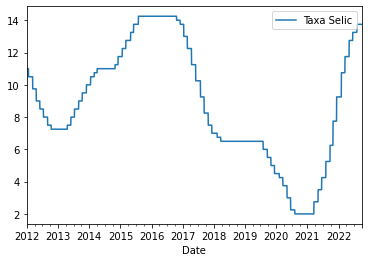

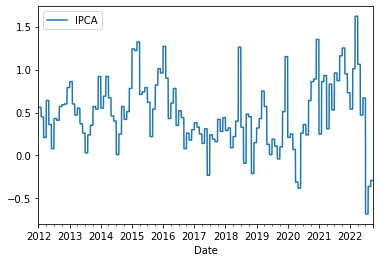

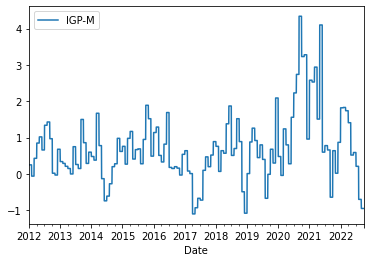

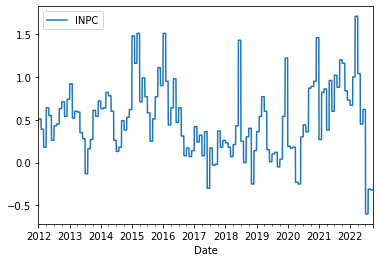

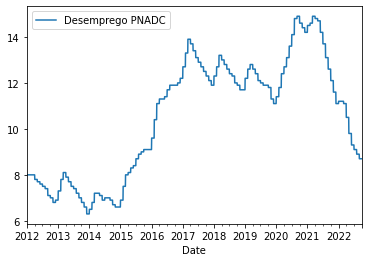

In [21]:
#Plotando alguns valores para uma visualização rápida dos dados
for i in list(data.columns)[1:]:
    data.plot('Date',i)

In [22]:
#O dataset está pré-processado para uso, podemos gravar o arquivo
data.reset_index(drop=True, inplace=True)
data.to_csv('datasets/economic_indicators.csv', index_label='index')

### 3 Dataset de índices da B3 (BOVESPA)

Repetindo o mesmo procedimento com o dataset de índices da B3 (antiga BOVESPA)

In [23]:
data = pd.read_csv('datasets/raw/bovespa_indexes.csv')
data.head()

,Date,Symbol,Adj Close,Close,High,Low,Open,Volume
0,2010-01-04,^BVSP,70045.0,70045.0,70081.0,68587.0,68587.0,1655400.0
1,2010-01-05,^BVSP,70240.0,70240.0,70595.0,69928.0,70046.0,1984200.0
2,2010-01-06,^BVSP,70729.0,70729.0,70937.0,70016.0,70237.0,2243600.0
3,2010-01-07,^BVSP,70451.0,70451.0,70723.0,70045.0,70723.0,1555000.0
4,2010-01-08,^BVSP,70263.0,70263.0,70766.0,70158.0,70455.0,1634400.0


In [24]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8071 entries, 0 to 8070
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       8071 non-null   object 
 1   Symbol     8071 non-null   object 
 2   Adj Close  8071 non-null   float64
 3   Close      8071 non-null   float64
 4   High       8071 non-null   float64
 5   Low        8071 non-null   float64
 6   Open       8071 non-null   float64
 7   Volume     8071 non-null   float64
dtypes: float64(6), object(2)
memory usage: 504.6+ KB


O dataset não possui dados nulos, não há necessidade de suprir omissões então.

In [25]:
#Verificando a quantidade de índices
data['Symbol'].value_counts()

^BVSP     3178
^IVBX     2446
^IBX50    2445
^IGCX        1
ICON         1
Name: Symbol, dtype: int64

In [26]:
#O dataset possui vários índices, mas os símbolos "ICON" e "^IGCX" só possuem uma entrada para cada.
#Não há necessidade de mantê-los.
data = data[data.Symbol != ('ICON')]
data = data[data.Symbol != ('^IGCX')]
data['Symbol'].value_counts()

^BVSP     3178
^IVBX     2446
^IBX50    2445
Name: Symbol, dtype: int64

In [27]:
#Definindo o tipo de dados para a coluna data organiza em ordem ascendente
data = data.astype({'Date': 'datetime64'}, copy=True, errors='raise')
data.sort_values(by=['Date'], ignore_index=True, inplace=True)
data

,Date,Symbol,Adj Close,Close,High,Low,Open,Volume
0,2010-01-04,^BVSP,70045.000000,70045.000000,70081.000000,68587.000000,68587.000000,1655400.0
1,2010-01-05,^BVSP,70240.000000,70240.000000,70595.000000,69928.000000,70046.000000,1984200.0
2,2010-01-06,^BVSP,70729.000000,70729.000000,70937.000000,70016.000000,70237.000000,2243600.0
3,2010-01-07,^BVSP,70451.000000,70451.000000,70723.000000,70045.000000,70723.000000,1555000.0
4,2010-01-08,^BVSP,70263.000000,70263.000000,70766.000000,70158.000000,70455.000000,1634400.0
...,...,...,...,...,...,...,...,...
8064,2022-11-03,^IBX50,19568.429688,19568.429688,19651.130859,19153.400391,19559.910156,0.0
8065,2022-11-03,^IVBX,13829.389648,13829.389648,13900.070312,13503.820312,13792.139648,0.0
8066,2022-11-04,^IBX50,19786.080078,19786.080078,20126.109375,19786.080078,19897.689453,0.0
8067,2022-11-04,^BVSP,118155.000000,118155.000000,120039.000000,116904.000000,116907.000000,16209500.0


In [28]:
#Eliminando os períodos excedentes para deixar o dataset do mesmo tamanho que os outros.
data = data.drop(data[data['Date'] >= pd.Timestamp(2022,10,1)].index)
data = data.drop(data[data['Date'] < pd.Timestamp(2012,1,1)].index)
data

,Date,Symbol,Adj Close,Close,High,Low,Open,Volume
496,2012-01-03,^BVSP,59265.000000,59265.000000,59288.000000,57836.000000,57836.000000,3083000.0
497,2012-01-04,^BVSP,59365.000000,59365.000000,59519.000000,58558.000000,59263.000000,2252000.0
498,2012-01-05,^BVSP,58546.000000,58546.000000,59354.000000,57963.000000,59354.000000,2351200.0
499,2012-01-06,^BVSP,58600.000000,58600.000000,59261.000000,58355.000000,58565.000000,1659200.0
500,2012-01-09,^BVSP,59083.000000,59083.000000,59220.000000,58599.000000,58601.000000,2244600.0
...,...,...,...,...,...,...,...,...
7995,2022-09-29,^BVSP,107664.000000,107664.000000,108449.000000,106244.000000,108449.000000,14588500.0
7996,2022-09-29,^IBX50,18016.000000,18016.000000,18138.009766,17779.699219,18138.009766,0.0
7997,2022-09-30,^IVBX,12604.830078,12604.830078,12662.629883,12287.910156,12371.910156,0.0
7998,2022-09-30,^BVSP,110037.000000,110037.000000,110502.000000,107315.000000,107664.000000,0.0


In [29]:
#O dataset está pré-processado para uso, podemos gravar o arquivo
data.reset_index(drop=True, inplace=True)
data.to_csv('datasets/bovespa_indexes.csv', index_label='index')

### 4 Dataset de ações da B3 (BOVESPA)

In [30]:
data = pd.read_csv('datasets/raw/bovespa_stocks.csv')
data

,Date,Symbol,Adj Close,Close,High,Low,Open,Volume
0,2022-10-03,SMAB11,8.360000,8.360000,8.370000,7.970000,8.000000,579.0
1,2010-01-04,MMXM3,1599.174927,1599.174927,1599.174927,1555.137817,1556.395996,20984.0
2,2010-01-05,MMXM3,1609.240479,1609.240479,1616.789795,1567.719849,1600.433105,22586.0
3,2010-01-06,MMXM3,1680.958008,1680.958008,1685.990845,1599.174927,1616.789795,37998.0
4,2010-01-07,MMXM3,1698.572876,1698.572876,1704.863892,1641.953735,1660.826782,33651.0
...,...,...,...,...,...,...,...,...
916501,2022-10-28 00:00:00,K3,2.210000,2.210000,2.280000,2.210000,2.280000,19800.0
916502,2022-10-31 00:00:00,K3,2.190000,2.190000,2.300000,2.130000,2.200000,117400.0
916503,2022-11-01 00:00:00,K3,2.080000,2.080000,2.270000,2.080000,2.200000,143500.0
916504,2022-11-03 00:00:00,K3,2.130000,2.130000,2.240000,2.060000,2.080000,262000.0


In [31]:
#Verificando se o dataset possui valores nulos
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 916506 entries, 0 to 916505
Data columns (total 8 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   Date       916506 non-null  object 
 1   Symbol     916506 non-null  object 
 2   Adj Close  916506 non-null  float64
 3   Close      916506 non-null  float64
 4   High       916506 non-null  float64
 5   Low        916506 non-null  float64
 6   Open       916506 non-null  float64
 7   Volume     916506 non-null  float64
dtypes: float64(6), object(2)
memory usage: 55.9+ MB


In [32]:
#Confirmando se não há valores NaN
data.isna().sum().sum()

0

O dataset não possui valores nulos, mas a coluna de data parece inconsistente.<br>
Ao usar o comando `#data = data.astype({'Date': 'datetime64'}, copy=True, errors='raise')`<br>
Ele levanta um erro pois, por algum motivo, nem todos os dados estão nos mesmos valores UTC.

Porém para corrigir isso precisamos passar o `utc=True`, o que retorna o erro `Cannot mix tz-aware with tz-naive values`. Ou sejam precisaríamos selecionar os dados `tz-naive` para depois reorganizar.

Como, no caso, não nos importamos com tanta precisão (basta os dias), iremos usar um workaround para remover essa informação.

In [33]:
data['Date'] = pd.to_datetime(data['Date'], errors='coerce')
data['Date'] = data['Date'].astype(str)
data['Date'] = data['Date'].str.replace(r' \d\d:\d\d:\d\d.*$', '', regex=True)
data['Date'] = pd.to_datetime(data['Date'], errors='coerce')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 916506 entries, 0 to 916505
Data columns (total 8 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   Date       916506 non-null  datetime64[ns]
 1   Symbol     916506 non-null  object        
 2   Adj Close  916506 non-null  float64       
 3   Close      916506 non-null  float64       
 4   High       916506 non-null  float64       
 5   Low        916506 non-null  float64       
 6   Open       916506 non-null  float64       
 7   Volume     916506 non-null  float64       
dtypes: datetime64[ns](1), float64(6), object(1)
memory usage: 55.9+ MB


In [34]:
#Organizando as entradas e eliminando o período excedente
data.sort_values(by=['Date'], ignore_index=True, inplace=True)
data = data.drop(data[data['Date'] >= pd.Timestamp(2022,10,1)].index)
data = data.drop(data[data['Date'] < pd.Timestamp(2012,1,1)].index)
data

,Date,Symbol,Adj Close,Close,High,Low,Open,Volume
99317,2012-01-02,RNEW11,124.492249,124.808456,124.808456,120.708908,120.708908,373.0
99318,2012-01-02,CTGP34,6.434609,8.166666,8.166666,8.166666,8.166666,0.0
99319,2012-01-02,I4,3.420329,5.859261,5.969714,5.811924,5.969714,8379057.0
99320,2012-01-02,HOOT4,5.900000,5.900000,5.900000,5.900000,5.900000,1000.0
99321,2012-01-02,CATP34,7.882007,10.584375,10.584375,10.584375,10.584375,0.0
...,...,...,...,...,...,...,...,...
896030,2022-09-30,RRRP3,35.610001,35.610001,36.509998,34.389999,34.700001,3589700.0
896031,2022-09-30,EGIE3,38.509998,38.509998,38.700001,38.110001,38.299999,1772800.0
896032,2022-09-30,ALPA3,17.870001,17.870001,18.000000,17.400000,17.450001,1700.0
896033,2022-09-30,LLIS3,1.600000,1.600000,1.620000,1.550000,1.600000,93900.0


In [35]:
#O dataset está pré-processado para uso, podemos gravar o arquivo
data.reset_index(drop=True, inplace=True)
data.to_csv('datasets/bovespa_stocks.csv', index_label='index')